<a href="https://colab.research.google.com/github/gimokid/learning-tensor-flow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

Thre are many definitions for a regression problem.  In our case we are
predicting a numerical variable based on some other combination of
variables, even shorter...predicting a number



# 01. Neural Network Regression with TensorFlow

There are many definitions for a [regression problem](https://en.wikipedia.org/wiki/Regression_analysis) but in our case, we're going to simplify it to be: predicting a number.

For example, you might want to:
- Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
- Predict the coordinates of a bounding box of an item in an image.
- Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).

In this notebook, we're going to set the foundations for how you can take a sample of inputs (this is your data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.

## What we're going to cover

Specifically, we're going to go through doing the following with TensorFlow:
- Architecture of a regression model
- Input shapes and output shapes
  - `X`: features/data (inputs)
  - `y`: labels (outputs)
- Creating custom data to view and fit
- Steps in modelling
  - Creating a model
  - Compiling a model
    - Defining a loss function
    - Setting up an optimizer
    - Creating evaluation metrics
  - Fitting a model (getting it to find patterns in our data)
- Evaluating a model
  - Visualizng the model ("visualize, visualize, visualize")
  - Looking at training curves
  - Compare predictions to ground truth (using our evaluation metrics)
- Saving a model (so we can use it later)
- Loading a model

Don't worry if none of these make sense now, we're going to go through each.

## How you can use this notebook

You can read through the descriptions and the code (it should all run), but there's a better option.

Write all of the code yourself.

Yes. I'm serious. Create a new notebook, and rewrite each line by yourself. Investigate it, see if you can break it, why does it break?

You don't have to write the text descriptions but writing the code yourself is a great way to get hands-on experience.

Don't worry if you make mistakes, we all do. The way to get better and make less mistakes is to **write more code**.

In [1]:
# Import TensorFlow
import tensorflow as tf

# Check its version
print(tf.__version__)

2.19.0


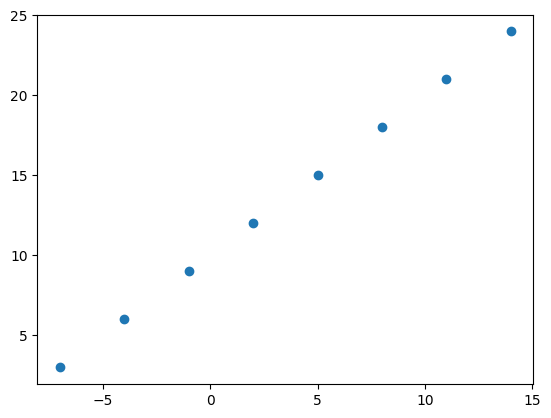

In [2]:
## Creating some data to view and fit
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)
plt.show()

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shape

In [4]:
# Create a demon tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"]) # input feature, independent variable
house_price = tf.constant([939700]) # output labels , dependent variable
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [6]:
X[1], y[1]

(np.float64(-4.0), np.float64(6.0))

In [7]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [9]:
X[0].ndim

0

In [10]:
X.ndim

1

In [11]:
tf.expand_dims(X , axis=-1)

<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]])>

In [12]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X.shape, y.shape
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [13]:
input_shape = X[0].shape
output_shape = y[0].shape
print(f"Input shape: {input_shape}")
print(f"Output shape: {output_shape}")
print("Scalers have no shape")

Input shape: ()
Output shape: ()
Scalers have no shape


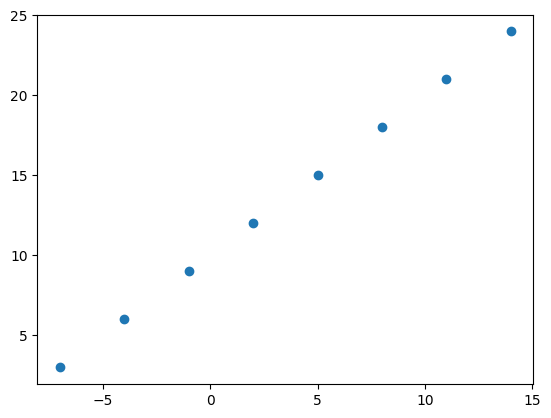

In [14]:
plt.scatter(X, y)
plt.show()

## Steps in modeling with TensorFlow

1. Creating a model - define the input and output layers as well as the hidden layers of a deep learning model
2. Compiling the model - define the loss function (in other words, the function which tells our mode how wroing it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. Fitting a model - letting the model tyr ot find patterns between X and y (or features and labels)

In [15]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), # sgd - stochastic gradient descent - how it should improve
              metrics=["mae"])  # mae - mean absolute error

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=10000, verbose=0)


In [16]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [17]:
# Try to make a prediction using our model
model.predict(tf.constant([-7.0], shape=(1,1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[2.8049345]], dtype=float32)

## Improve Our Model

We can improve our model by altering the steps we took to create the model

1. **Creating a model** - we might add more layers, increase the number of hidden units (neurons) within each hidden layer, change the activation function of each layer.

2. **Compiling the model** - we might change the optimization function or perhaps the learning rate of the the optimization function.

3. **Fitting the model** - fit the model for more epochs or more training data

In [18]:
X_train = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0], shape=(8,1))
y_train = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0], shape=(8,1))

In [19]:
# Trying more hidden layers

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),  # each one is a hidden layer, with 100 neurons
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

model1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

model_fit1 = model1.fit( X_train, y_train, epochs=100, verbose=0)

In [20]:
model1.predict(tf.constant([17.0], shape=(1,1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[27.800085]], dtype=float32)

## Evaluating a Model Performance

In practice a typical workflow when building a neural network.  Buid it -> Fit it -> Evaluate it (repeat)

When it comes to evaluation ...visualize, visulaize, visualize

* The data - what data are we working with? What does it look like?
* The model - what does our model look like?
* The training of the model - how doe a model perform while it learns
* The prediction of the model - how do the predictions of a model line up against the ground truth

In [21]:
# Make bigger dataset

X1_train = tf.range(-300, 300, 5)
X1_train = tf.expand_dims(X1_train, axis=-1)
y1_train = X1_train + 10
X1_train[:5], y1_train[:5]

(<tf.Tensor: shape=(5, 1), dtype=int32, numpy=
 array([[-300],
        [-295],
        [-290],
        [-285],
        [-280]], dtype=int32)>,
 <tf.Tensor: shape=(5, 1), dtype=int32, numpy=
 array([[-290],
        [-285],
        [-280],
        [-275],
        [-270]], dtype=int32)>)

In [22]:
X1_train.shape, y1_train.shape

(TensorShape([120, 1]), TensorShape([120, 1]))

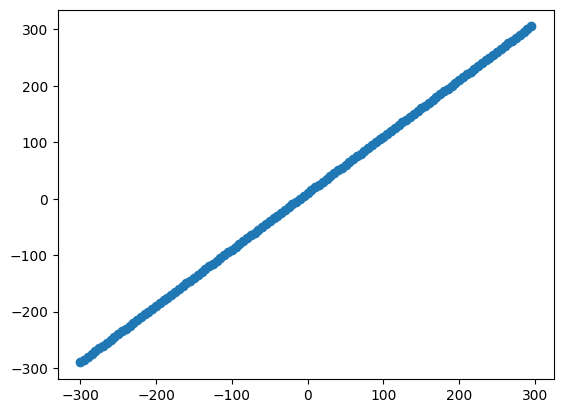

In [23]:
plt.scatter(X1_train, y1_train)

### The 3 Sets...
* Training set the model learns from this data, typically 80% of the data set
* Validation set - the model gets tuned on this data, 10 - 15%
* Test set - the model gets evaluated using this data, 10 - 15%

In [24]:
len(X1_train)

120

In [25]:
# Split the data into training and test set
X1_test = X1_train[100:]
X1_train = X1_train[:100]
y1_test = y1_train[100:]
y1_train = y1_train[:100]

len(X1_train), len(X1_test)



(100, 20)

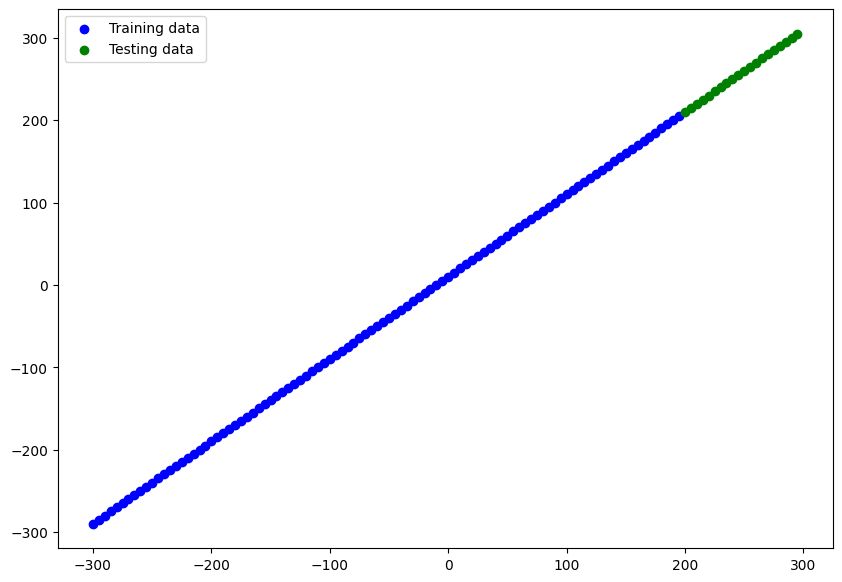

In [26]:
plt.figure(figsize=(10,7))
plt.scatter(X1_train, y1_train, c="b", label="Training data")
plt.scatter(X1_test, y1_test, c="g", label="Testing data")
plt.legend();

In [27]:
# Let's have a look at how to build a neural network for our data

# 1. Create the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model2.fit(X1_train, y1_train, epochs=100, verbose=0)

In [28]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
from os import name
# Let's create a model that builds automatically by defining the input_shape argument

tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),  # each one is a hidden layer, with 100 neurons
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
], name = "model_3" )

model3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# model3.fit(X1_train, y1_train, epochs=100, verbose=0)

model3.summary()

Model: "model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of parameters in the model
* Trainable params - the parametes (patterns) the model can update as it train
* Non-trainable params - these parameters are not updated during training (this is typically when you bring in parameters from already learned parameters models **transfer learning**)

In [30]:
# Fit the model to training data
model3.fit(X1_train, y1_train, epochs=1000, verbose=0)

In [31]:
# Get a summary of our model
model3.summary()

Model: "model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,205 (121.90 KB)

 Trainable params: 10,401 (40.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,804 (81.27 KB)

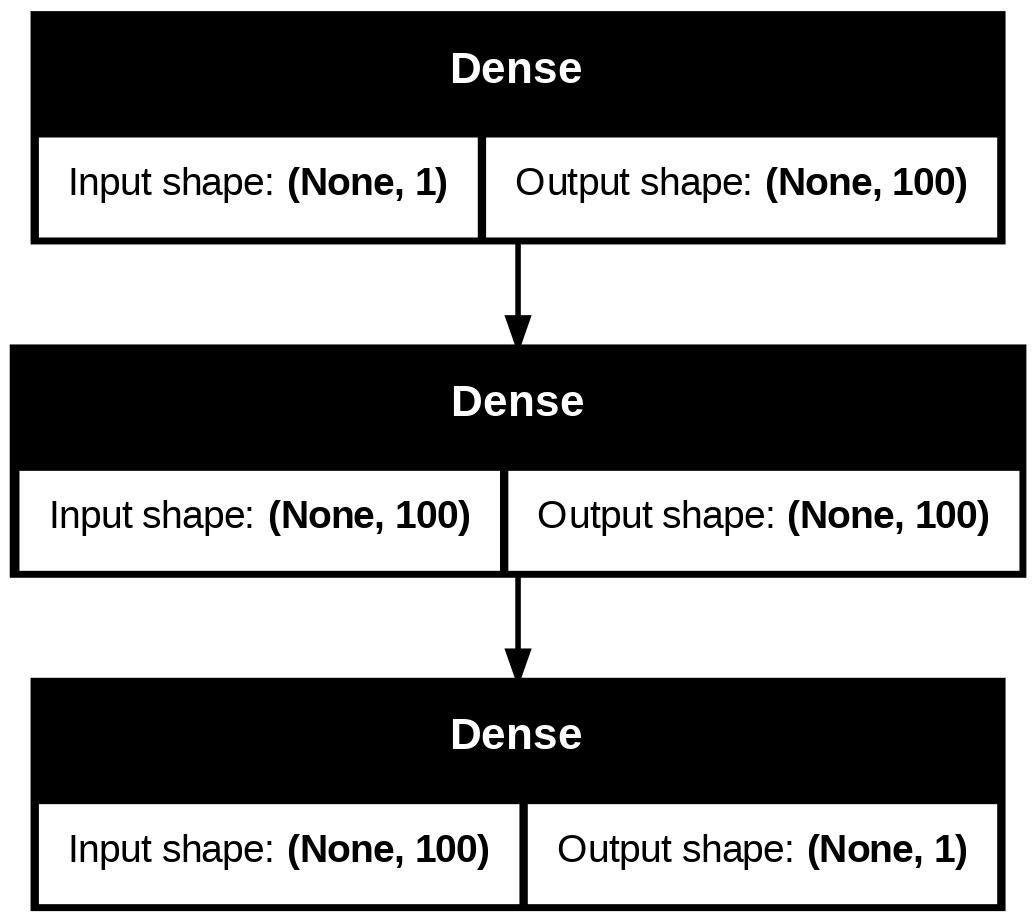

In [32]:
from tensorflow.keras.utils import plot_model
plot_model(model=model3, show_shapes=True)

### Visulazing model's prediction

To visulize predictions, it's a good idea to plot them agains the ground truth labels.

Often you'll see this in the forma of y_test or y_true vs. y_pred (ground truth vs. our model's prediction

In [33]:
X1_test[:10]

<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
array([[200],
       [205],
       [210],
       [215],
       [220],
       [225],
       [230],
       [235],
       [240],
       [245]], dtype=int32)>

In [34]:
y_pred = model3.predict(X1_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[215.22458],
       [220.35263],
       [225.4808 ],
       [230.60901],
       [235.73718],
       [240.8654 ],
       [245.99356],
       [251.1218 ],
       [256.24997],
       [261.37897],
       [266.508  ],
       [271.637  ],
       [276.76596],
       [281.8949 ],
       [287.0238 ],
       [292.15274],
       [297.28195],
       [302.41125],
       [307.54053],
       [312.66995]], dtype=float32)

In [35]:
# Let's create a plotting function
def plot_predictions(train_data=X1_train,
                     train_labels=y1_train,
                     test_data=X1_test,
                     test_labels=y1_test,
                     predictions=y_pred):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    plt.legend();

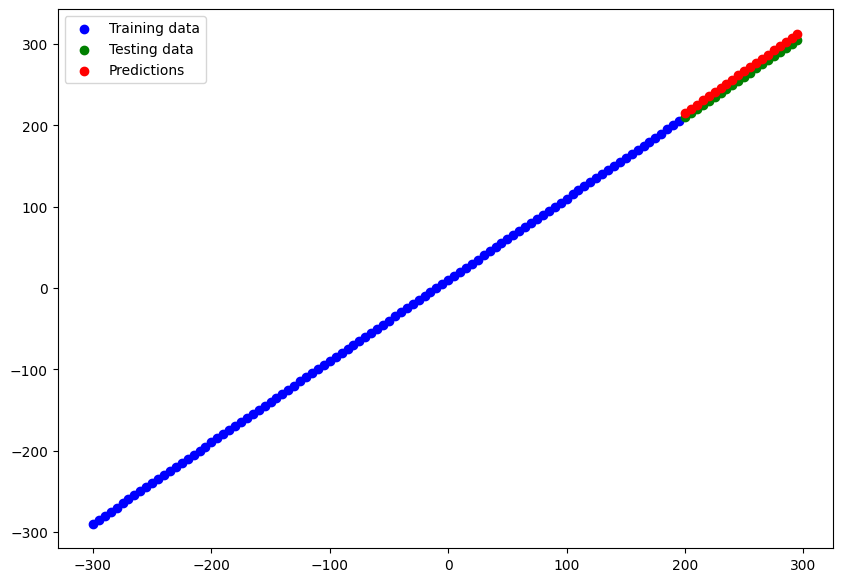

In [36]:
plot_predictions(X1_train,
                 y1_train,
                 X1_test,
                 y1_test,
                 y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate you model's preformance.

Since we are working on a regression, two types of metrics are available:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [37]:
# Evaluate the model on the test set.
model3.evaluate(X1_test, y1_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 6.4450 - mae: 6.4450


[6.444998741149902, 6.444998741149902]

In [38]:
y1_test.shape

TensorShape([20, 1])

In [39]:
y_pred.shape

(20, 1)

In [40]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([215.22458, 220.35263, 225.4808 , 230.60901, 235.73718, 240.8654 ,
       245.99356, 251.1218 , 256.24997, 261.37897, 266.508  , 271.637  ,
       276.76596, 281.8949 , 287.0238 , 292.15274, 297.28195, 302.41125,
       307.54053, 312.66995], dtype=float32)>

In [41]:
# Calculate the mean absolute error
mae = tf.keras.metrics.mae(y_true=tf.squeeze(y1_test), y_pred=tf.squeeze(y_pred))
mae


<tf.Tensor: shape=(), dtype=float32, numpy=6.444998741149902>

In [42]:
# Make some functions to calculate MAE & MSE

def mae(y_true, y_pred):
    return tf.metrics.mae(tf.squeeze(y_true), tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mse(tf.squeeze(y_true), tf.squeeze(y_pred))

### Running experiments to improve our model

Build a model -> Fit it -> Evaluate it -> Tweak It -> Repeat

1. Get more data - more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels.
2. Make the model larger (using more complex models) - this may come in the form of more layers or more hidden units in each layer
3. Train for longer - give your model more chance to finde the patters in the data

Let's do 3 modelling experiments:
1.  `model_1` - same as the original model, 1 layer, trained for 100 epochs
2.  `model_2` - 2 layers, trained for 100 epochs
3.  `model_3` - 2 layers, trained for 500 epochs

In [43]:
X1_train, y1_train # X is the inputs(features/data) y is the output(labels)

(<tf.Tensor: shape=(100, 1), dtype=int32, numpy=
 array([[-300],
        [-295],
        [-290],
        [-285],
        [-280],
        [-275],
        [-270],
        [-265],
        [-260],
        [-255],
        [-250],
        [-245],
        [-240],
        [-235],
        [-230],
        [-225],
        [-220],
        [-215],
        [-210],
        [-205],
        [-200],
        [-195],
        [-190],
        [-185],
        [-180],
        [-175],
        [-170],
        [-165],
        [-160],
        [-155],
        [-150],
        [-145],
        [-140],
        [-135],
        [-130],
        [-125],
        [-120],
        [-115],
        [-110],
        [-105],
        [-100],
        [ -95],
        [ -90],
        [ -85],
        [ -80],
        [ -75],
        [ -70],
        [ -65],
        [ -60],
        [ -55],
        [ -50],
        [ -45],
        [ -40],
        [ -35],
        [ -30],
        [ -25],
        [ -20],
        [ -15],
        [ -10],
       

In [44]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"])

# 3. Fit the model
model_1.fit(X1_train, y1_train, epochs=100, verbose=1)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 164.3713 - mae: 164.3713 
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 89.9292 - mae: 89.9292 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 74.0535 - mae: 74.0535 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 46.7742 - mae: 46.7742
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 87.3840 - mae: 87.3840 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 71.5365 - mae: 71.5365 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 42.7977 - mae: 42.7977
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 94.2251 - mae: 94.2251
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 78.2654 - mae: 78.2654
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 60.8753 - mae: 60.8753
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 46.6462 - mae: 46.6462
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 86.6768 - mae: 86.6768 
Epoch 13/100
4/4 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


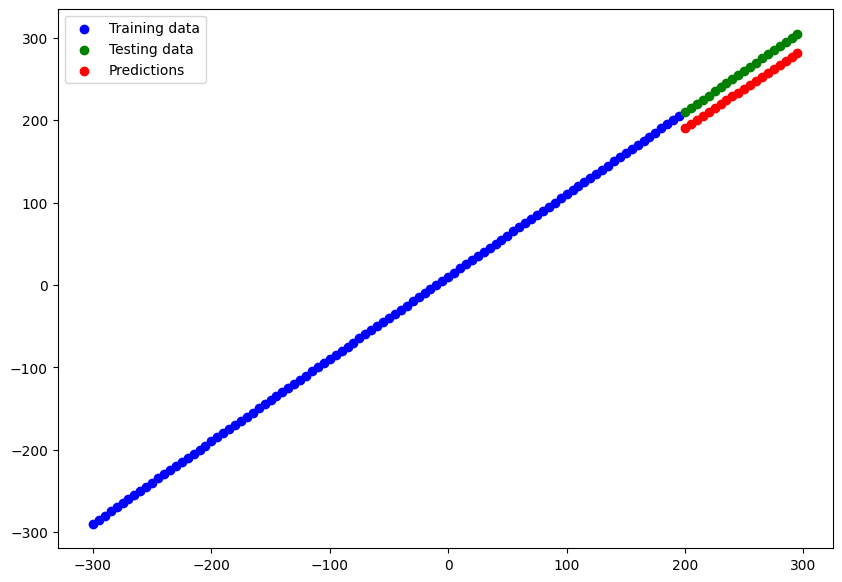

In [45]:
# Make and plot predictions for `model_1`

y_pred_1 = model_1.predict(X1_test)
plot_predictions(predictions=y_pred_1)

In [46]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_true=y1_test, y_pred=y_pred_1)
mse_1 = mse(y_true=y1_test, y_pred=y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=21.449262619018555>,
 <tf.Tensor: shape=(), dtype=float32, numpy=462.13348388671875>)

In [47]:
# Build model_2, two dense layers trained for 100 epochs

# Set random seed
tf.random.set_seed(42)

# 1. Define the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_2.fit(X1_train, y1_train, epochs=100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


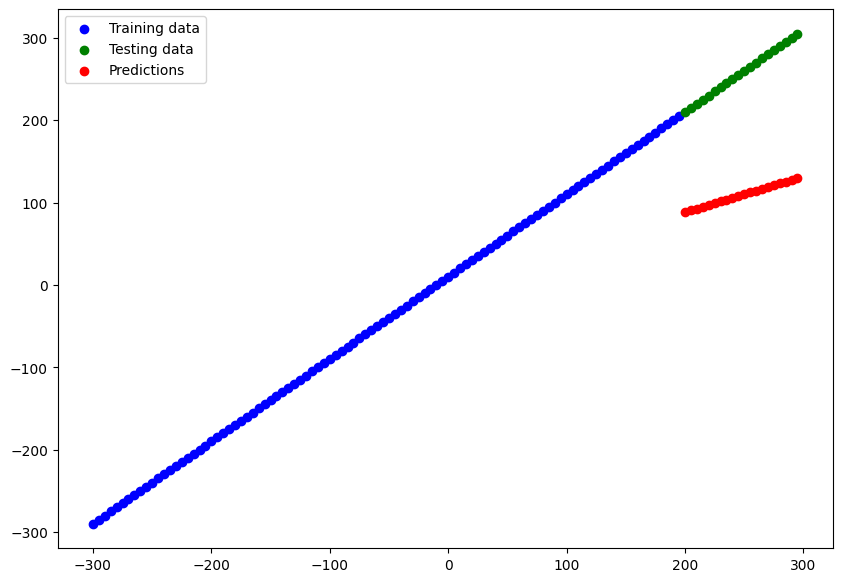

In [48]:
# Make predictions and plot for model_2
y_pred_2 = model_2.predict(X1_test)
plot_predictions(predictions=y_pred_2)

In [49]:
# Calculate mae and mse for model_2
mae_2 = mae(y_true=y1_test, y_pred=y_pred_2)
mse_2 = mse(y_true=y1_test, y_pred=y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=148.3553009033203>,
 <tf.Tensor: shape=(), dtype=float32, numpy=22270.626953125>)

In [50]:
# Build model_3, 2 Denses layers and train for 500 epochs

# Set random seed
tf.random.set_seed(42)

# Define the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the modle
model_3.fit(X1_train, y1_train, epochs=500, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


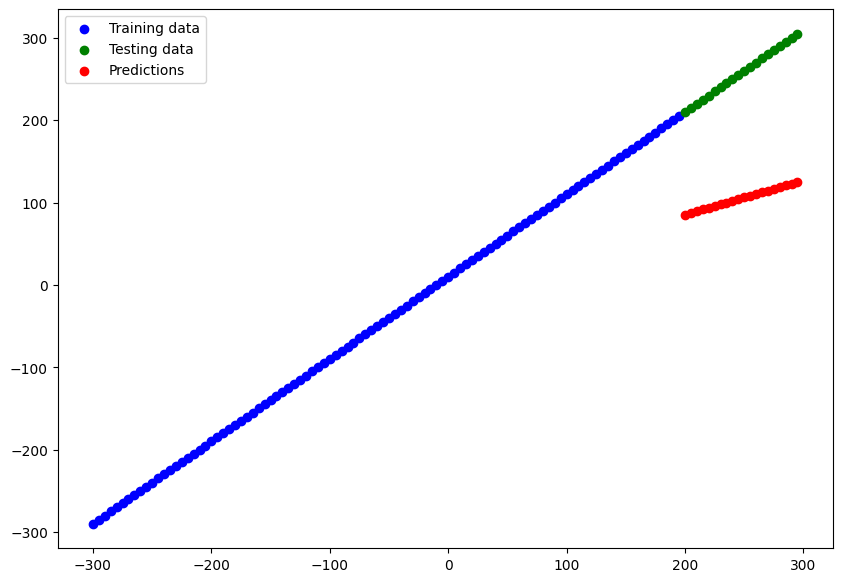

In [51]:
# Make predictions and plot for model_3
y_pred_3 = model_3.predict(X1_test)
plot_predictions(predictions=y_pred_3)

In [52]:
mae_3=mae(y_true=y1_test, y_pred=y_pred_3)
mse_3=mse(y_true=y1_test, y_pred=y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=152.28579711914062>,
 <tf.Tensor: shape=(), dtype=float32, numpy=23473.39453125>)

In [53]:
# Try model_4 1 dense layer 500 epochs

# Set random seed
tf.random.set_seed(42)

# Define model_4
model_4 = tf.keras.Sequential()
model_4.add(tf.keras.layers.Dense(1))

# Compile model_4
# model_4.compile(loss=tf.keras.losses.mae,
#                optimizer=tf.keras.optimizers.SGD())

# Alternate format
model_4.compile(optimizer='sgd', loss='mae')

In [54]:
# Fit model_4
model_4.fit(X1_train,y1_train, epochs=500, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


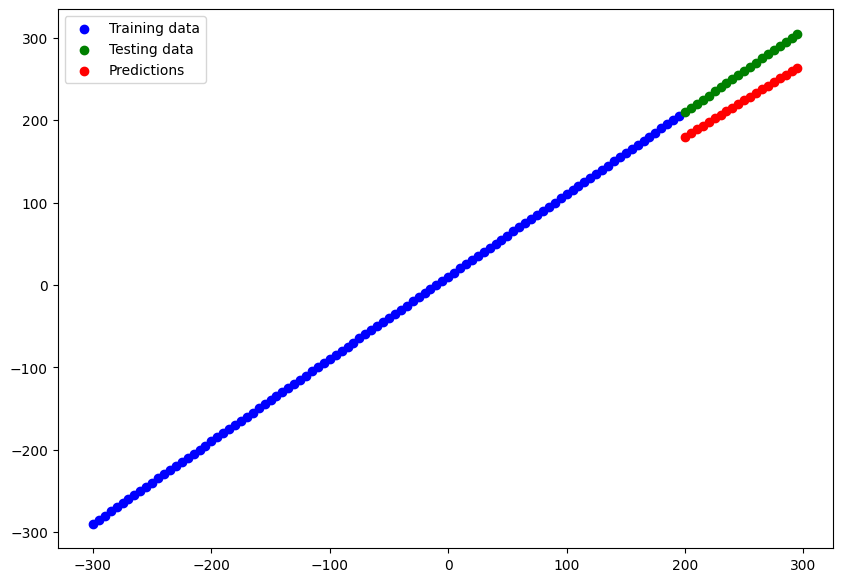

In [55]:
# Make predictions based on model_4 and plot
y_pred_4 = model_4.predict(X1_test)
plot_predictions(predictions=y_pred_4)

In [56]:
# Calculate mae and mse for model_4
mae_4 = mae(y_true=y1_test, y_pred=y_pred_4)
mse_4 = mse(y_true=y1_test, y_pred=y_pred_4)
mae_4, mse_4

(<tf.Tensor: shape=(), dtype=float32, numpy=35.45885467529297>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1268.645263671875>)

🔑 **Note** You want to starte with small experiments (small models) and md make sure theyw work and then increase their scale when necessary.

# Comparing results of Experiments

Let's compare the results.

In [57]:
# Let's compare our model's results using Pandas Dataframe

import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],   #.numpy() gets the value
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()],
                 ["model_4", mae_4.numpy(), mse_4.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,21.449263,462.133484
1,model_2,148.355301,22270.626953
2,model_3,152.285797,23473.394531
3,model_4,35.458855,1268.645264


In [58]:
model_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Tracking Experiments:

* TensorBoard: a component of TensorFlow library to help track modelling experitment
* Weights & Biases: a tool for tracking all kindes of machine learning experiments (plugs into TensorBoard)

# Saving our Models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or mobile app.

There are two main formats: 1) SavedModel 2) HDF5 (Considered Legacy)

In [59]:
# Save model using SavedModel format

model_1.save("best_modle_SavedModel_format.keras")

In [60]:
model_1.save("best_modle_HDF5_format.h5")

## Loading our Models



In [61]:
# Load in saved keras model
loaded_model = tf.keras.models.load_model("best_modle_SavedModel_format.keras")

In [62]:
loaded_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [63]:
model_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [64]:
# Make predictions using loaded model

model_1_preds = model_1.predict(X1_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [65]:
loaded_model_preds = loaded_model.predict(X1_test)
#

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [66]:
model_1_preds == loaded_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# Download our model to be used outside of Colab

Colab is ephemeral?  So any information in the enviroment is lost after you disconnect.

Use '!' in code cell to get to enviroment.  For exeample try !ls

In [69]:
!ls
!pwd

best_modle_HDF5_format.h5	    model.png
best_modle_SavedModel_format.keras  sample_data
/content


If you want to download your files from Google Colab:
1. You can go to the files tab and right click on the file you are after and click 'download'
2. Use code (see cell below)
3. Save to google google drive by mounting google drive and using !cp command

In [71]:
# Download file from Google Colab
from google.colab import files
files.download("/content/best_modle_SavedModel_format.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>